# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
df.head() # Examining the dataset

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [4]:
# Importing some necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
sns.set() #setting default seaborn style

1. Is the distribution of body temperatures normal? 
Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population. 
Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test 

In [6]:
# We can check if distribution looks normal by plotting a histogram. We calculate the recommended number of bins
n_bins=int(np.sqrt(len(df))) 

In [7]:
n_bins

11

Text(0, 0.5, 'Frequency')

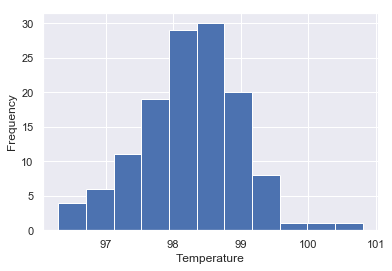

In [8]:
plt.hist(df.temperature,bins=11)
plt.xlabel("Temperature")
plt.ylabel("Frequency")

Looks almost but not quite normal. This particular sample is skewed to the left. But we know that histogram suffers from binning bias. So we can plot the ecdf 

In [9]:
# Define ecdf function which returns two numpy arrays x and y which can be plotted to generate ecdf for a data
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [10]:
x_temp,y_temp=ecdf(df["temperature"])

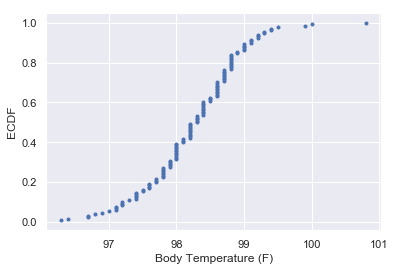

In [11]:
# Generate plot
plt.plot(x_temp,y_temp,marker='.',linestyle='none')
# Label the axes
plt.xlabel("Body Temperature (F)")
plt.ylabel("ECDF")
plt.show()

ECDF has normal appearance . Now let us check for normality using bootstraping by generating random normal samples. First calculate mean and standard deviation of the distribution. We can approximate the sample mean and sample normal distribution as the mean and standard deviation of the distribution

In [12]:
mean = np.mean(df["temperature"])
std = np.std(df["temperature"])

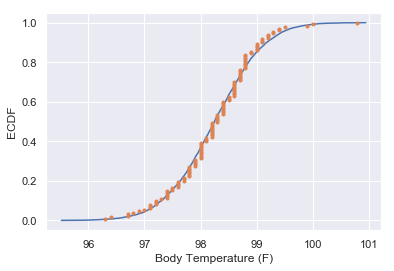

In [13]:
samples=np.random.normal(mean,std,size=10000)
x_theor,y_theor=ecdf(samples)
plt.plot(x_theor,y_theor)
plt.plot(x_temp,y_temp,marker='.',linestyle='none')
plt.xlabel("Body Temperature (F)")
plt.ylabel("ECDF")
plt.show()


By overlaying the sample ecdf with the theoretical ecdf, we can see that the sample does look approximately normal because there is a reasonable match

In [14]:
print(mean)

98.24923076923078


For the CLT to hold, we need a sample size n>=30. Here we have 130 observations. So the dataset seems to be large enough. Further, if the measurements are for different people, we can say that the observations are independent since one person's body temperature and heart rate has no bearing on another person's temperature and heart rate. 

Is the true population mean really 98.6 degrees F? This question looks similar to the speed of light measurement example from the datacamp course. Michelson published a set of measurements and Newcomb published only a mean of his observations around the same time for the speed of light. For this question, we will perform a hypothesis test where we will essentially test if we could have gotten the 130 data points provided in the dataset, if the true population mean of the temperature is actually 98.6

In [ ]:
# Null hypothesis is true mean temperature =98.6 

In [15]:
temp_shifted=df["temperature"]+98.6-np.mean(df["temperature"])

In [16]:
x_shifted,y_shifted=ecdf(temp_shifted)

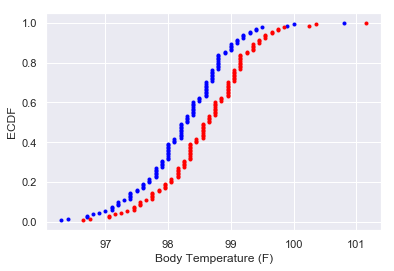

In [17]:
plt.plot(x_temp,y_temp,marker='.',linestyle='none',color="blue")
plt.plot(x_shifted,y_shifted,marker='.',linestyle='none',color="red")
plt.xlabel("Body Temperature (F)")
plt.ylabel("ECDF")
plt.show()
# Red is the shifted ecdf, blue is original ecdf

In [21]:
# Write a function to calculate the difference of mean of a sample and the true population mean
def diff_from_true(data,true_mean=98.6):
        return np.mean(data)-true_mean
diff_obs=diff_from_true(df["temperature"])

In [22]:
diff_obs #observed difference from the true population mean we are testing against

-0.35076923076921673

In [70]:
# Now we generate bootstrap replicates from the given dataset and compute the test statistic (diff of means). 
# For this we will write a function which generates bootstrap replicates and calculates the required test statistic (pass this function as argument)

def draw_bs_reps(data,func,size=1):
    bs_sample_reps=np.empty(size)
    for i in range(size):
        bs_sample=np.random.choice(data,size=len(data))
        bs_sample_reps[i]=func(bs_sample)
    return bs_sample_reps

bs_sample_reps=draw_bs_reps(temp_shifted,diff_from_true,size=10000)    

In [71]:
p_value=np.sum(bs_sample_reps<diff_obs)/len(bs_sample_reps)

In [73]:
p_value

0.0

A p-value of 0 implies that we did not even get one replicate value from the samples we drew which had a difference from the true mean as extreme as diff_obs (~-0.35)

For frequentist testing, we will use a 1 sample test because we are trying to see if the mean from a 1d sample data is equal to the true mean of the population. 

In [30]:
import scipy

In [31]:
true_mean = 98.6

onesample_results = scipy.stats.ttest_1samp(df["temperature"], true_mean)

In [32]:
onesample_results

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

Above result indicates a very small pvalue which once again agrees with our previous bootstrap hypothesis testing result. This once again implies that we can reject the null-hypothesis that the true mean of the population is 98.6 F 

In the above test we used the t-test because we do not know the population standard deviation and only have access to the sample standard deviation. Under such circumstances it is appropriate to use the t-statistic. 

In [79]:
from statsmodels.stats.weightstats import ztest

In [81]:
onesample_results_z = ztest(df["temperature"], value=true_mean)

In [82]:
onesample_results_z

(-5.4548232923645195, 4.9021570141012155e-08)

The z-test also yields a negligible value and our rejection of the null hypothesis is still valid. My answer to why the results are similar is that because we have a large sample size which is approximately normal. 

In [83]:
df_small_sample=np.random.choice(df["temperature"],size=10)

In [85]:
onesample_results_small = scipy.stats.ttest_1samp(df_small_sample, true_mean)

In [86]:
onesample_results_small

Ttest_1sampResult(statistic=-3.049067166852843, pvalue=0.013813735042021788)

In [87]:
onesample_results_z_small = ztest(df_small_sample, value=true_mean)

In [88]:
onesample_results_z_small

(-3.049067166852843, 0.0022955315266128557)

In [ ]:
The t-test for this random sample of 10 yields a pvalue of 0.0138. For the purpose of illustrating this let us assume that we started with a significance level of 0.01. Our pvalue is higher than this which means that we cannot reject the null-hypothesis. However, the z-test pvalue tells us that we can reject the null hypothesis. This is not a good idea (rejecting the null hypothesis) given that we only have 10 data points. I interpret this as the t-test telling us that even though the mean of the sample may not be close to 98.6, because we only have 10 data points, it is not so unlikely that these data points may have been collected from a population whose true mean is 98.6. On the other hand, the z-test does not consider the number of data points and can lead us to erroneous conclusions. 

5. At what temperature should we consider someone's temperature to be "abnormal"? 
As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach. 
Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws. 

Let us use the bootstrap method first . We will generate bootstrap replicates and generate a 95% confidence interval

In [126]:
def conf_int_low(data):
    conf_int=np.percentile(data,[2.5,97.5])
    
    return conf_int[0]


In [127]:
bs_sample_reps_conf=draw_bs_reps(df["temperature"],conf_int_low,size=100000)    

In [137]:
ci_low_b=np.mean(bs_sample_reps_conf)

In [118]:
def conf_int_high(data):
    conf_int=np.percentile(data,[2.5,97.5])
    return conf_int[1]

In [140]:
bs_sample_reps_conf=draw_bs_reps(df["temperature"],conf_int_high,size=10000)    

In [141]:
ci_high_b=np.mean(bs_sample_reps_conf)

By doing some rudimentary kind of nonsense I got confidence interval of (96.7674,99.5794). Let us see what functions give us

In [121]:
x_bar = np.mean(df["temperature"])
s = np.std(df["temperature"])

In [133]:
ci_low_f,ci_high_f = scipy.stats.norm.interval(0.95, loc=x_bar, scale=s)

In [134]:
print('95% confidence interval: {:0.5} - {:0.5}'.format(ci_low_f, ci_high_f))

95% confidence interval: 96.818 - 99.681


In [135]:
#margin of error
print('margin of error: +/-{:0.5}'.format((ci_high_f - x_bar))) 

margin of error: +/-1.4315


In [131]:
m_error=(ci[1]-ci[0])/2

In [132]:
m_error

1.431474942482538

In [142]:
print('95% confidence interval from bootstrap: {:0.5} - {:0.5}'.format(ci_low_b, ci_high_b))

95% confidence interval from bootstrap: 96.768 - 99.577


In [143]:
#margin of error from bootstrap
print('margin of error: +/-{:0.5}'.format((ci_high_b - x_bar))) 

margin of error: +/-1.3276


Is there a significant difference between males and females in normal temperature? 
What testing approach did you use and why? 
Write a story with your conclusion in the context of the original problem. 

Let us do some visual EDA first 

In [146]:
males = df[df["gender"] == 'M']
females = df[df["gender"] == 'F']

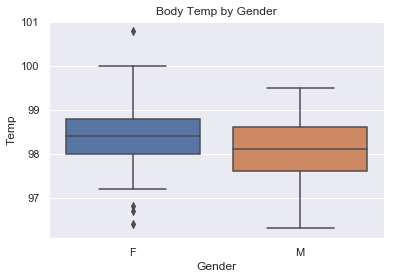

In [147]:
#boxplot may be good way to see the distribution of temperature for different genders
sns.boxplot(x = 'gender', y = 'temperature', data=df)
_ = plt.xlabel('Gender')
_ = plt.ylabel('Temp')
_ = plt.title('Body Temp by Gender')
plt.show()

Mean body temperature of females in the sample data is higher than that of the males. More outliers among females. Is the temperature difference we are seeing true or by chance? 

Let us also check if the temperatures separated by gender are normally distributed by visualizing ecdfs. We will overlay the individual ecdfs with the theoretical ones for normal distribution to check for normality

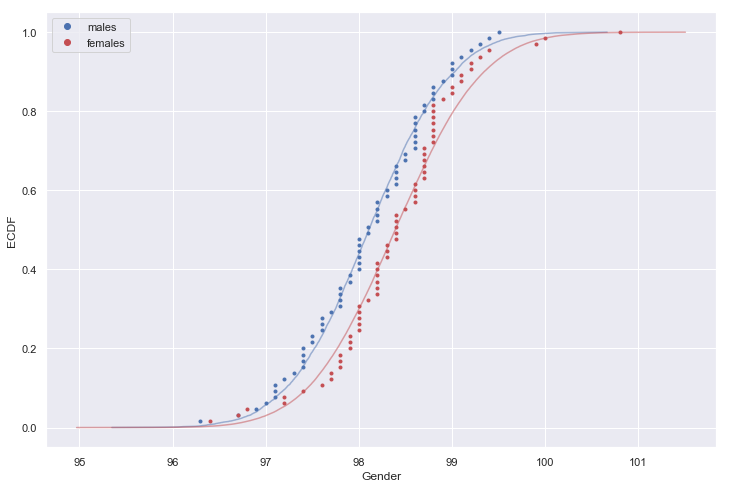

In [154]:
sns.set(rc={"figure.figsize": (12, 8)})
x_male, y_male = ecdf(males.temperature)
x_female, y_female = ecdf(females.temperature)

# Generate plot for data
plt.plot(x_male, y_male, marker = '.', linestyle = 'none', color='b')
plt.plot(x_female, y_female, marker='.', linestyle='none', color='r')

# get 10,000 random samples from a normal distribution for male temperature for theoretical ecdf. Similarly for womeen
m_norm_dist = np.random.normal(np.mean(males.temperature), np.std(males.temperature), 10000)
mnd_x, mnd_y = ecdf(m_norm_dist)
plt.plot(mnd_x, mnd_y, color='b', alpha=0.5)
# get 10000 random samples from a normal distribution for female temperature in the same way as above
f_norm_dist = np.random.normal(np.mean(females.temperature), np.std(females.temperature), 100000)
fnd_x, fnd_y = ecdf(f_norm_dist)
plt.plot(fnd_x, fnd_y, color='r', alpha=0.5)
plt.xlabel('Gender')
plt.ylabel('ECDF')
plt.legend(('males', 'females'), markerscale=2)

It appears that both male and female temperatures from the above dataset are approximately normal. Males more so than females.Let us conduct a bootstrap test to see if there is a difference in means between these two distributions.  

In [155]:
temp_males=males["temperature"]
temp_females=females["temperature"]
temp_m_shifted = temp_males - np.mean(temp_males) + x_bar
temp_f_shifted = temp_females - np.mean(temp_females) + x_bar

In the above procedure, we have shifted the samples such that they have the same mean( we are assuming null hypothesis that there is no difference between males and females temperature means is true). Now we will draw 10000 replicates of the mean from both these distributions 

In [156]:
bs_replicates_m = draw_bs_reps(temp_m_shifted, np.mean, size=10000)
bs_replicates_f = draw_bs_reps(temp_f_shifted, np.mean, size=10000)

In [157]:
bs_replicates = bs_replicates_m - bs_replicates_f

In [162]:
empirical_diff_means=np.mean(temp_males)-np.mean(temp_females)
p = np.sum(bs_replicates <= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)

p-value = 0.0124


For significance level of 0.05, we will have to reject the null-hypothesis because the p-value is 0.0124. This low p-value indicates that assuming the null hypothesis is true which means there is no difference between mean temperatures of males and females, the probability that we get a difference in means that we have in our dataset is 0.0124 (which seems quite low). This means that male and female mean temperatures are not the same.  